In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


warnings.filterwarnings(action='ignore')

In [17]:
train_df = pd.read_csv('./Data/train.csv') # Train
train_df = train_df.drop(columns=['ID']) 
val_df = pd.read_csv('./Data/val.csv') # Validation

val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal

train_x = train_df.copy()

def get_pred_label(model_pred):
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

In [18]:


from sklearn import preprocessing

def df_normal(norm_df):
    col = list(norm_df.columns[:])
    x = norm_df[col].values
    #최대값과 최소값의 값 가져오기
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler
    # 정규화 시킬 최종 값은 비율로 계산되기 때문에 float설정
    x_scaled = min_max_scaler.fit_transform(x.astype(float))
    x_scaled

    norm_df_norm = pd.DataFrame(x_scaled, columns=col, index=norm_df.index)
    return norm_df_norm

In [20]:
train_df_norm = df_normal(train_df)
val_x_norm = df_normal(val_x)

In [26]:
train_df_norm.to_csv("./norm_Data/train_norm.csv",index=False)
val_x_norm.to_csv("./norm_Data/val_x_norm.csv",index=False)


In [28]:
val_x_norm.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
28457,0.907349,0.725133,0.868055,0.348965,0.481234,0.551452,0.561737,0.685828,0.480640,0.643668,...,0.388826,0.637336,0.568382,0.438913,0.523647,0.257375,0.545613,0.354415,0.003069,0.999826
28458,0.900517,0.709703,0.850779,0.270710,0.489491,0.544557,0.556383,0.689571,0.501823,0.609683,...,0.382689,0.554674,0.575542,0.525004,0.504670,0.399586,0.521043,0.344500,0.006724,0.999861
28459,0.910463,0.722728,0.872260,0.352196,0.482466,0.550039,0.564999,0.651923,0.519854,0.648162,...,0.405864,0.605004,0.568999,0.428226,0.522940,0.264520,0.556500,0.356753,0.005085,0.999896
28460,0.988342,0.695769,0.842372,0.308731,0.469669,0.545766,0.543473,0.675804,0.568850,0.653727,...,0.375270,0.535192,0.579067,0.378578,0.494755,0.385389,0.524941,0.344093,0.000225,0.999977
28461,0.916931,0.708646,0.897580,0.335219,0.461629,0.593477,0.531229,0.696403,0.566360,0.634312,...,0.389839,0.638785,0.568656,0.453265,0.472822,0.459472,0.535191,0.351548,0.000840,1.000000


In [30]:
# 정규화된 데이터 테스트

collist01 = ['V3','V9','V11','V12','V16','V17']
train_x_norm =train_df_norm.loc[:,collist01]
model = IsolationForest(n_estimators=50, max_samples=len(train_x_norm), contamination=0.00105, random_state=42, verbose=0)
model.fit(train_x_norm)
## Evaluation : Validation set
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred
val_x_norm2 = val_x_norm.loc[:,collist01]
val_y = val_df['Class'] # Label

val_pred = model.predict(val_x_norm2) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.6061198984211713]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.13      0.63      0.21        30

    accuracy                           1.00     28462
   macro avg       0.56      0.81      0.61     28462
weighted avg       1.00      1.00      1.00     28462



In [145]:
temp_li01 = list(train_df.columns)
temp_li01.remove('V12')
temp_li01.remove('V17')
temp_li01.remove('V18')
temp_li01.remove('V19')
temp_li01.remove('V9')
temp_li01.remove('V30')
temp_li01.remove('V24')

In [149]:
# 일반 데이터 데스트
# collist01 = ['V3','V9','V11','V12','V16']

colnames = []
f1s = []
for col in temp_li01:


    collist01 = ['V12','V17','V18','V19','V9','V30','V14',col]

    
    train_x =train_df.loc[:,collist01]
    model = IsolationForest(n_estimators=60, max_samples=len(train_x), contamination=0.00105, random_state=42, verbose=0)
    model.fit(train_x)
    ## Evaluation : Validation set
    def get_pred_label(model_pred):
        # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
        model_pred = np.where(model_pred == 1, 0, model_pred)
        model_pred = np.where(model_pred == -1, 1, model_pred)
        return model_pred
    val_x = val_df.loc[:,collist01]
    val_y = val_df['Class'] # Label

    val_pred = model.predict(val_x) # model prediction
    val_pred = get_pred_label(val_pred)
    val_score = f1_score(val_y, val_pred, average='macro')
    print(f'Validation F1 Score : [{val_score}]')
    print(classification_report(val_y, val_pred))
    
    colnames.append(collist01)
    f1s.append(val_score)

Validation F1 Score : [0.7361086644105512]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.52      0.43      0.47        30

    accuracy                           1.00     28462
   macro avg       0.76      0.72      0.74     28462
weighted avg       1.00      1.00      1.00     28462

Validation F1 Score : [0.7828166559008255]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.65      0.50      0.57        30

    accuracy                           1.00     28462
   macro avg       0.83      0.75      0.78     28462
weighted avg       1.00      1.00      1.00     28462

Validation F1 Score : [0.7709490362991742]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.55      0.53      0.54        30

    accuracy                           1.00     28462

In [150]:
df = pd.DataFrame({'colnames':colnames , 'f1s':f1s})
df

,colnames,f1s
0,"[V12, V17, V18, V19, V9, V30, V24, V1]",0.736109
1,"[V12, V17, V18, V19, V9, V30, V24, V2]",0.782817
2,"[V12, V17, V18, V19, V9, V30, V24, V3]",0.770949
3,"[V12, V17, V18, V19, V9, V30, V24, V4]",0.827106
4,"[V12, V17, V18, V19, V9, V30, V24, V5]",0.745046
5,"[V12, V17, V18, V19, V9, V30, V24, V6]",0.777567
6,"[V12, V17, V18, V19, V9, V30, V24, V7]",0.772507
7,"[V12, V17, V18, V19, V9, V30, V24, V8]",0.763931
8,"[V12, V17, V18, V19, V9, V30, V24, V10]",0.820588
9,"[V12, V17, V18, V19, V9, V30, V24, V11]",0.804883


In [151]:
df[df.f1s == df.f1s.max()].colnames

3      [V12, V17, V18, V19, V9, V30, V24, V4]
11    [V12, V17, V18, V19, V9, V30, V24, V14]
Name: colnames, dtype: object

In [175]:

colnames = []
f1s = []
Is = []
col = 'V14'
for i in range(10,61):
    # 일반 데이터 데스트
# collist01 = ['V3','V9','V11','V12','V16']

    collist01 = ['V12','V17','V18','V19','V9','V30','V14']
    
    train_x =train_df.loc[:,collist01]
    model = IsolationForest(n_estimators=60, max_samples=len(train_x), contamination=0.0007 +(0.00001*i), random_state=42, verbose=0)
    model.fit(train_x)
    ## Evaluation : Validation set
    def get_pred_label(model_pred):
        # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
        model_pred = np.where(model_pred == 1, 0, model_pred)
        model_pred = np.where(model_pred == -1, 1, model_pred)
        return model_pred
    val_x = val_df.loc[:,collist01]
    val_y = val_df['Class'] # Label

    val_pred = model.predict(val_x) # model prediction
    val_pred = get_pred_label(val_pred)
    val_score = f1_score(val_y, val_pred, average='macro')
    print(f'Validation F1 Score : [{val_score}]')
    print(classification_report(val_y, val_pred))
    
    colnames.append(collist01)
    f1s.append(val_score)
    Is.append(i)
    

Validation F1 Score : [0.8398593381861659]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.57      0.68        30

    accuracy                           1.00     28462
   macro avg       0.92      0.78      0.84     28462
weighted avg       1.00      1.00      1.00     28462

Validation F1 Score : [0.8398593381861659]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.57      0.68        30

    accuracy                           1.00     28462
   macro avg       0.92      0.78      0.84     28462
weighted avg       1.00      1.00      1.00     28462

Validation F1 Score : [0.8398593381861659]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.57      0.68        30

    accuracy                           1.00     28462

In [176]:
i_df = pd.DataFrame({'i':Is , 'f1s':f1s })
i_df

,i,f1s
0,10,0.839859
1,11,0.839859
2,12,0.839859
3,13,0.839859
4,14,0.839859
5,15,0.839859
6,16,0.852809
7,17,0.852809
8,18,0.852809
9,19,0.865262


In [164]:
i_df[i_df.f1s == i_df.f1s.max()].i

28    58
29    59
30    60
Name: i, dtype: int64

In [ ]:

colnames = []
f1s = []
Is = []
col = 'V14'
for i in range(10,61):
    # 일반 데이터 데스트
# collist01 = ['V3','V9','V11','V12','V16']

    collist01 = ['V12','V17','V18','V19','V9','V30','V14']
    
    train_x =train_df.loc[:,collist01]
    model = IsolationForest(n_estimators=60, max_samples=len(train_x), contamination=0.0007 +(0.00001*i), random_state=42, verbose=0)
    model.fit(train_x)
    ## Evaluation : Validation set
    def get_pred_label(model_pred):
        # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
        model_pred = np.where(model_pred == 1, 0, model_pred)
        model_pred = np.where(model_pred == -1, 1, model_pred)
        return model_pred
    val_x = val_df.loc[:,collist01]
    val_y = val_df['Class'] # Label

    val_pred = model.predict(val_x) # model prediction
    val_pred = get_pred_label(val_pred)
    val_score = f1_score(val_y, val_pred, average='macro')
    print(f'Validation F1 Score : [{val_score}]')
    print(classification_report(val_y, val_pred))
    
    colnames.append(collist01)
    f1s.append(val_score)
    Is.append(i)
    

In [178]:
collist01 = ['V12','V17','V18','V19','V9','V30','V14']


train_x =train_df.loc[:,collist01]
model = IsolationForest(n_estimators=60, max_samples=len(train_x), contamination=0.0009, random_state=42, verbose=0)
model.fit(train_x)
## Evaluation : Validation set
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred
val_x = val_df.loc[:,collist01]
val_y = val_df['Class'] # Label

val_pred = model.predict(val_x) # model prediction
val_modelscore = model.decision_function(val_x)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.8652615319692264]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.86      0.63      0.73        30

    accuracy                           1.00     28462
   macro avg       0.93      0.82      0.87     28462
weighted avg       1.00      1.00      1.00     28462



In [179]:
val_x2 = val_x[:]
val_x2['Class'] = val_y
val_x2['score'] = val_modelscore
val_x2['pred'] = val_pred

In [186]:
val_x2['noans'] = val_x2['pred']

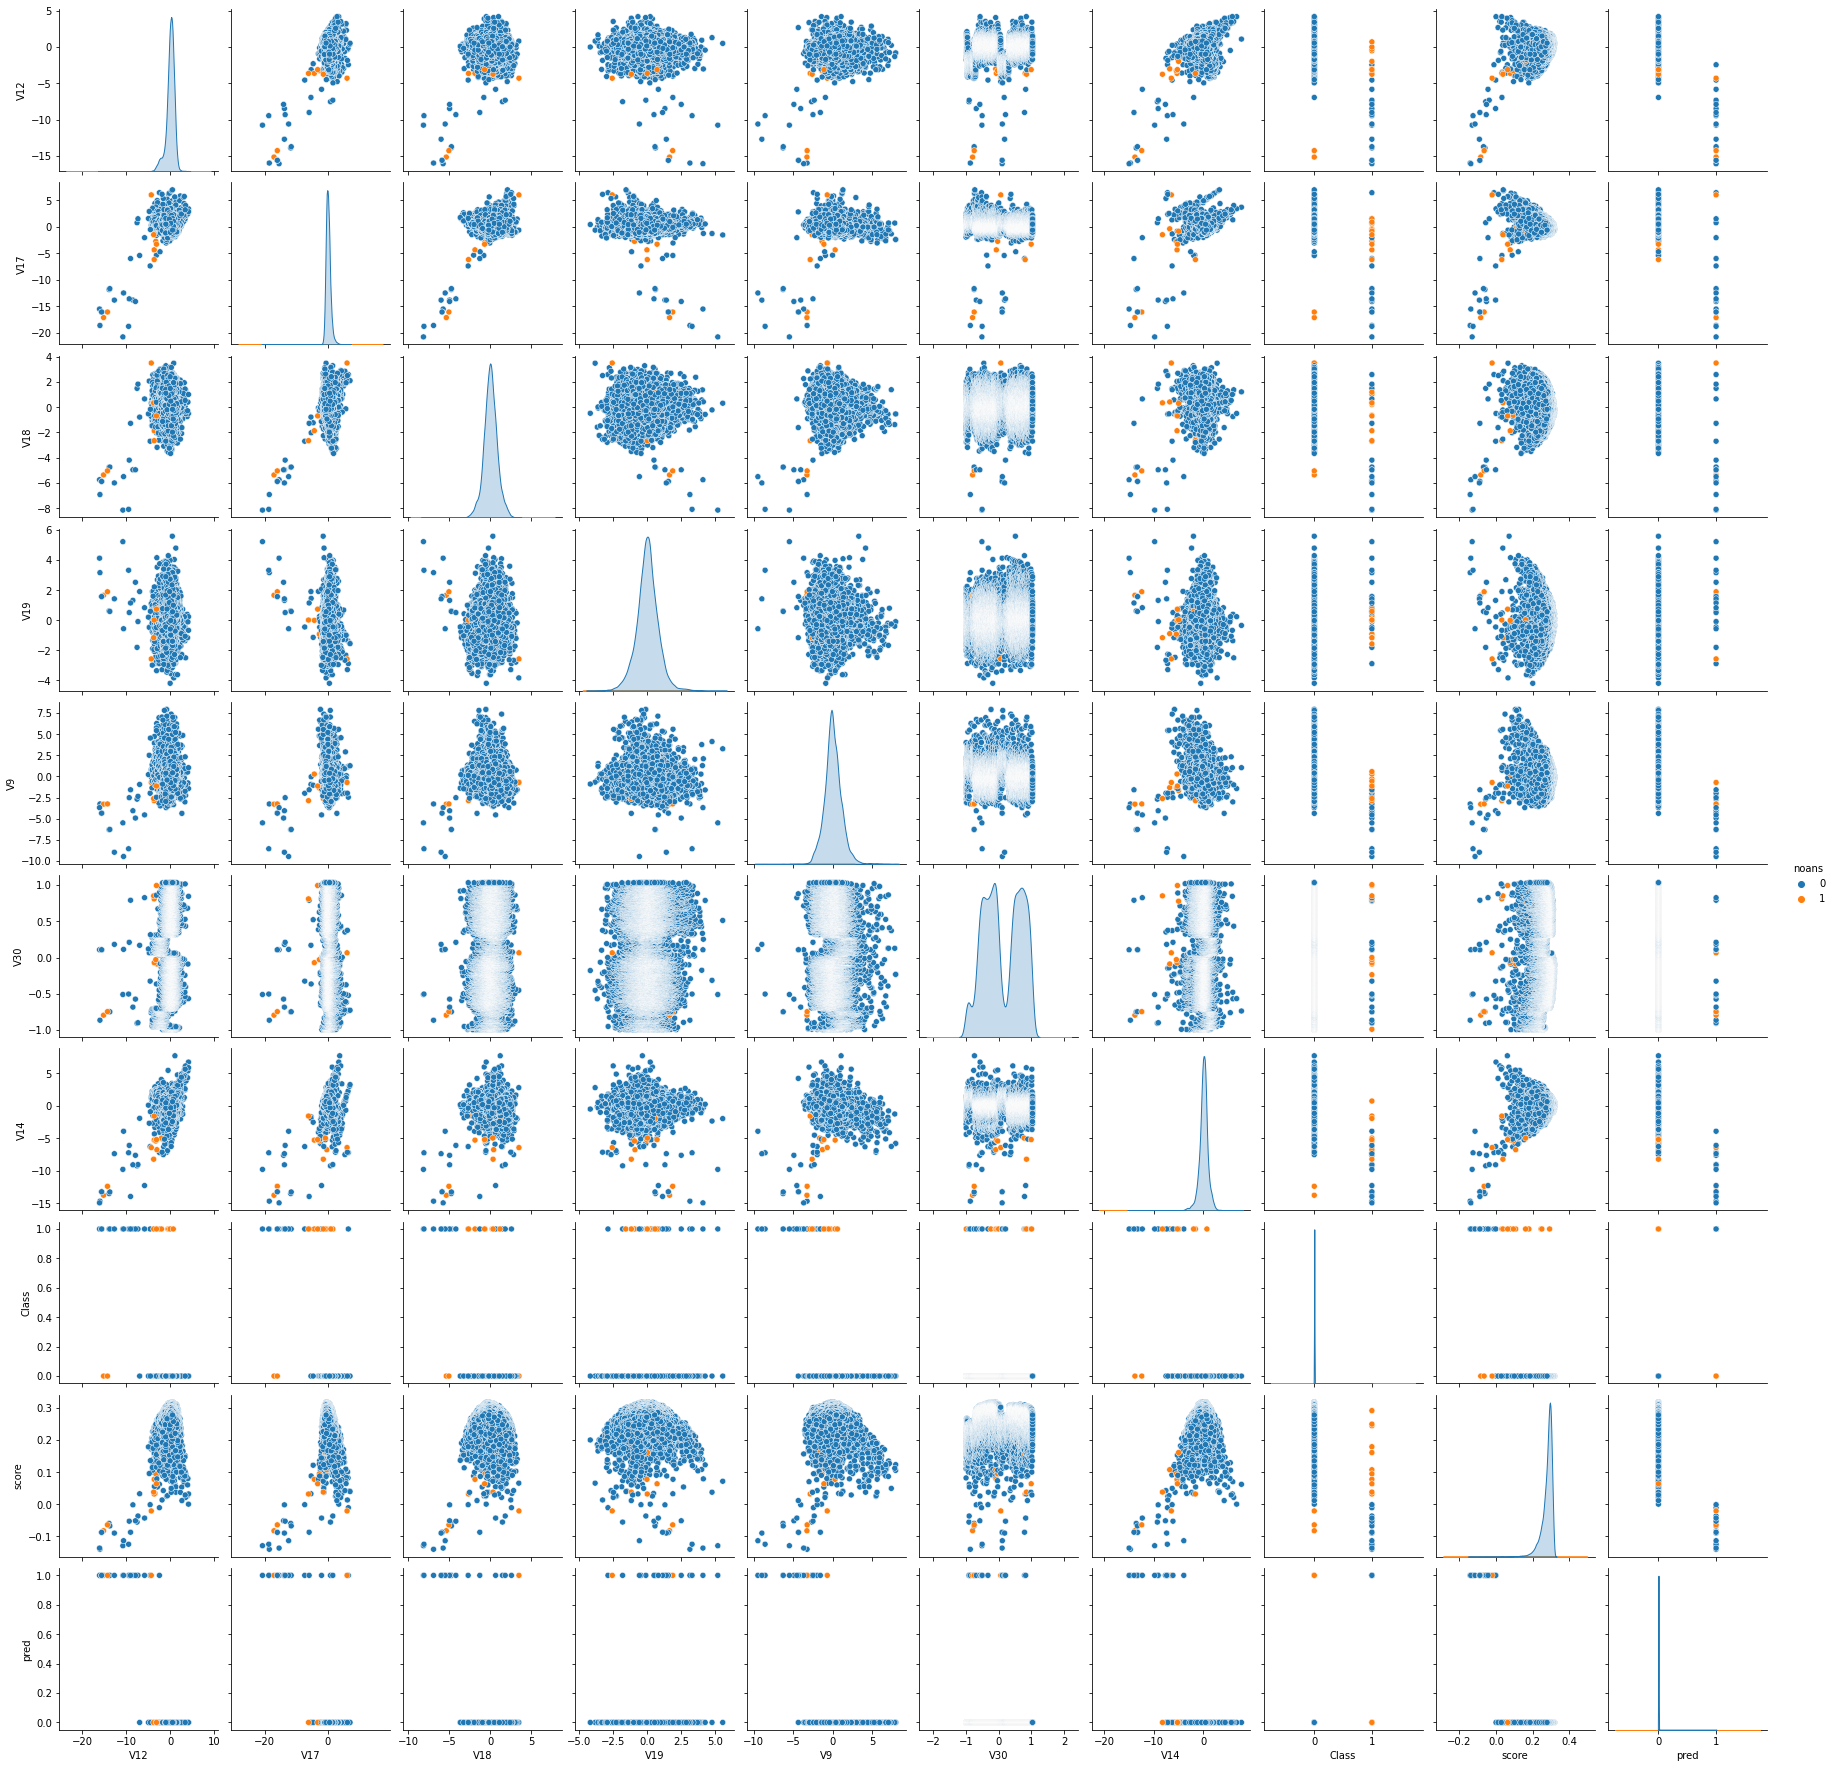

In [187]:
sns.pairplot(
    data=val_x2,
    hue='noans'
    
)

plt.show()

In [167]:

#제출용
test_df = pd.read_csv('./Data/test.csv') # Train
test_df.head()
test_x = test_df.loc[:,collist01]
test_pred = model.predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)
## Submission
submit = pd.read_csv('./Data/sample_submission.csv')
submit.head()
submit['Class'] = test_pred
submit.to_csv('./submit.csv', index=False)